In [40]:
import matplotlib.pyplot as plt
import numpy as np
import nibabel as nib
import os

In [3]:
def load_processed_data(file_processed_images: str = None,
                        file_processed_masks: str = None):
    imgs= np.load(os.path.join(file_processed_images))
    masks =np.load(os.path.join(file_processed_masks))
    return imgs, masks

In [4]:
def get_clean_path(path: str):
    return os.path.normpath(path.replace("//","/").replace("/r", "/r").replace("\n", "/n"))

def get_substrings(path_to_folder: list[str], str_match: str = '_liver') -> list[str]:
    """
    In a folder, identify all files which include the substring str_match.
    
    Args:
        path_to_folder (list[str]): list of strings pointing to a paths.
        str_match (str): substring to look for in path_to_folder.
    Returns:
        List of strings of file names that match str_match
    """
    list_with_matched_substrings = list(filter(lambda x: str_match in x, path_to_folder))

In [17]:
data_path_raw_train = "F:/MA/lits2017_data/full_dataset/raw/"


'F:/MA/lits2017_data/full_dataset/raw/volume-31.nii.gz'

In [54]:
data_path_raw_train = "F:/MA/lits2017_data/full_dataset/raw"
data_path_processed_train = "F:/MA/lits2017_data/full_dataset/processed"

In [55]:
imgs, masks = load_processed_data("F:/MA/lits2017_data/full_dataset/processed/imgs_train.npy",
                                  "F:/MA/lits2017_data/full_dataset/processed/masks_train.npy")

In [62]:
print(imgs.shape)

(13713, 256, 256)


In [61]:
print(imgs.)
abc = imgs.flatten()
print((abc >5000).sum())
print(imgs.flatten().max())
print(imgs.flatten().min())

291
26883
-4247


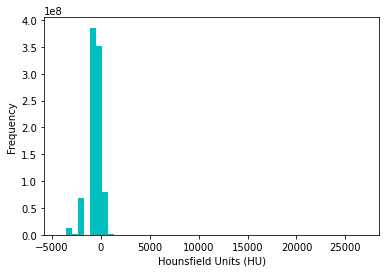

In [56]:
plt.hist(imgs.flatten(), bins=50, color='c')
plt.xlabel("Hounsfield Units (HU)")
plt.ylabel("Frequency")
plt.show()

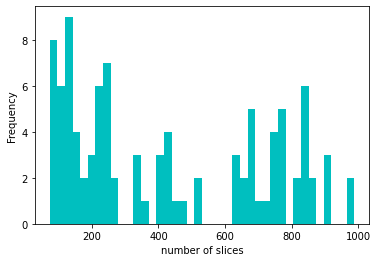

In [44]:
# get overview of number of axial slices
filenames = os.listdir(data_path_raw_train)
n = os.listdir(data_path_raw_train).__len__() / 2
num_slices = []
for i in range(0, int(n)):
    image_i = nib.load(os.path.join(data_path_raw_train, filenames[i]))
    num_slices.append(image_i.shape[2])

plt.hist(num_slices, bins=40, color='c')
plt.xlabel("number of slices")
plt.ylabel("Frequency")
plt.show()

In [50]:
# livers = nib.load(os.path.join(data_path_raw_train, 'ircad_e01_liver.nii.gz'))
image1 =  nib.load(os.path.join(data_path_raw_train, 'volume-31.nii'))
print(image1.shape)

mask1 = nib.load(os.path.join(data_path_raw_train, 'segmentation-31.nii'))
print(mask1.shape)

# print(os.path.join(data_path_raw, liver))
abcfdata = image1.get_fdata()

# which_nonzero = []
# for idx in range(0, abcfdata.__len__()):
#     if abcfdata[idx].sum() > float(0.0):
#         which_nonzero.append(abcfdata[idx])

# # print(which_nonzero.__len__())
# print(abcfdata.__len__())
# print(which_nonzero)
# for idx in range(0, abcfdata.__len__()):
#     if abcfdata[idx] is which_nonzero[0]:
#         5+5
#         # print(idx)
        
# for idx in range(0, abcfdata[74].__len__()):
#     if abcfdata[74][idx].sum() > float(0.0):
#         # print(idx)
#         1+1
        
# print(abcfdata[74][228])
# np.unique(abcfdata[74][228])

(512, 512, 91)
(512, 512, 91)
(512, 512, 91)


In [75]:
training_mask = nib.load(os.path.join(data_path_raw_train, 'ircad_e02_liver.nii.gz'))
training_image = nib.load(os.path.join(data_path_raw_train, 'ircad_e02_orig.nii.gz')) 
training_mask.shape
mask_2d = np.array(training_mask.get_fdata()[::2, ::2, 27]).sum()
print(mask_2d.sum())
len(np.unique(mask_2d)) != 1
len(np.unique(mask_2d)) 

0.0


1

In [76]:
training_mask.shape

(512, 512, 172)

In [74]:
masks, imgs = load_processed_data('F:/MA/ircad-dataset/preprocessed/train/masks_train.npy', 'F:/MA/ircad-dataset/preprocessed/train/imgs_train.npy')
print(masks.shape)
print(imgs.shape)

(1647, 256, 256)
(1647, 256, 256)


In [71]:
print(masks.flatten().min())
print(masks.flatten().max())
print(imgs.flatten().min())
print(imgs.flatten().max())

0
1
0
255


In [72]:
imgs.flatten()

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [61]:
print(training_mask.get_fdata().min())
print(training_mask.get_fdata().max())

print(training_image.get_fdata().min())
print(training_image.get_fdata().max())

# checks out

0.0
1.0
-1024.0
1023.0


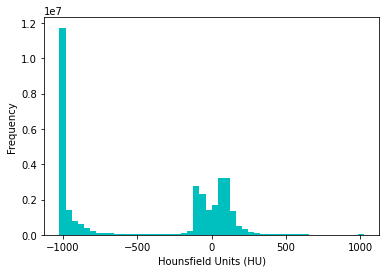

In [63]:
plt.hist(training_image.get_fdata().flatten(), bins=50, color='c')
plt.xlabel("Hounsfield Units (HU)")
plt.ylabel("Frequency")
plt.show()

In [40]:

def show_slices(slices):
   """ Function to display row of image slices """
   fig, axes = plt.subplots(1, len(slices))
   for i, slice in enumerate(slices):
       axes[i].imshow(slice.T, cmap="gray", origin="lower")

In [48]:
training_image.shape

(512, 512, 129)

In [1]:
training_image.get_fdata()[100, :, :].shape

NameError: name 'training_image' is not defined

Text(0.5, 0.98, 'Center slices for EPI image')

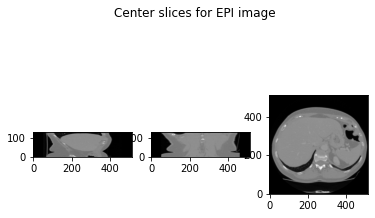

In [50]:
slice_0 = training_image.get_fdata()[100, :, :]
slice_1 = training_image.get_fdata()[:, 100, :]
slice_2 = training_image.get_fdata()[:, :, 100]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slices for EPI image")  

In [52]:
print(training_mask.get_fdata().shape)
print(training_mask.get_fdata()[::2, ::2, 27].shape)

(512, 512, 129)
(256, 256)


In [ ]:
# nii_first = nib.load(os.path.join(data_path, 'segmentation-31.nii'))
# nii_last = nib.load(os.path.join(data_path, 'segmentation-130.nii'))

# Take a look at the header
# print(nii_first.header)

Get and set individual fields in the header using dict (mapping-type) item access. For example:

In [25]:
livers.header['cal_max']

array(0., dtype=float32)

Some header fields have set_ and get_ methods. Good practice to use them if available!

In [ ]:
nii_first.header.get_base_affine()

NIfTI images have an affine relating the voxel coordinates to world coordinates in RAS+ space.
NIfTI header format can specify this affine in one of three ways:
    1) sform affine
    2) qform affine
    3) fall-back header affine.
Algorithm https://nipy.org/nibabel/nifti_images.html#choosing-image-affine chooses. 

In [ ]:
nii_first.affine

In [4]:
imgs, masks = load_processed_data(file_processed_images= "F:/MA/ircad-dataset/preprocessed/train/imgs_train.npy",
                                  file_processed_masks= "F:/MA/ircad-dataset/preprocessed/train/masks_train.npy")

In [6]:
imgs[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [7]:
masks[0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)